# TP5 M1 info -- Introduction au traitement du signal, aux signaux sonores et aux images -- À la découverte des images RGB (Red Green Blue)

**But du TP** :
* manipuler les composantes Rouge, Vert et Bleu des images
* realisation de filtrages par canaux

**Avertissement** :
Il peut être tentant d'utiliser ChatGPT ou d'autres outils d'écriture de code. Mais il ne s'agit que d'une introduction, couvrant des concepts très simples pour manipuler des fichiers. Nous vous recommandons fortement de ne pas l'utiliser. Vous aurez suffisamment de temps pour réaliser par vous-même les quelques fonctions qui vous sont demandées. Et vous les assimilerez bien mieux. Vous devrez réutiliser ces fonctions pour l'évaluation, ce qui vous confrontera à de nouvelles données. Essayez donc de rendre ces fonctions aussi générales que possible.

**Astuces**:
* Essayez de faire fonctionner vos algorithmes sur n'importe quelle taille d'image.
* N'hésitez pas à créer des fonctions pour chaque partie des traitements.

In [ ]:
# OS setup
#!cat /etc/os-release
!apt-get install -q=2 tree

# Data loading
!git clone https://gitlab.com/jeromefarinas/tp-m1-ts.git

In [1]:
# Some usefull library
import matplotlib.pyplot as plt
import scipy.signal
import numpy as np

# Rehaussement par Laplacien

1. Charger l'image tp-m1-ts/tp5/peppers.png et afficher la.

![Extrait de Lena](https://gitlab.com/jeromefarinas/tp-m1-ts/-/raw/main/tp5/peppers.png?ref_type=heads)

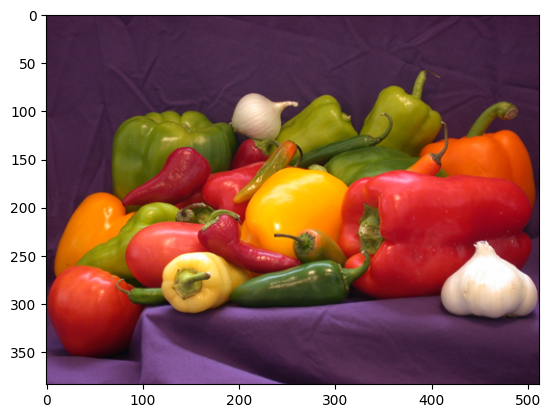

In [2]:
# A vous...
peppers = plt.imread('tp-m1-ts/tp5/peppers.png')
plt.imshow(peppers)

2. Créer le masque correspondant à l'opérateur Laplacien avec un centre négatif. Filtrer l'image en utilisant la fonction de le déconvolution [scipy.signal.convolve2d](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html) sur chaque composante de l'image. Afficher le résultat.

In [5]:
laplacian_mask = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])

In [3]:
# A vous...
def laplacian_mask_filter(image, mask):
    filtered_image = np.zeros_like(image)
    for i in range(3):
        filtered_image[:,:,i] = scipy.signal.convolve2d(image[:,:,i], mask, mode='same', boundary='symm')
    return filtered_image

In [6]:
filtered_peppers = laplacian_mask_filter(peppers, laplacian_mask)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


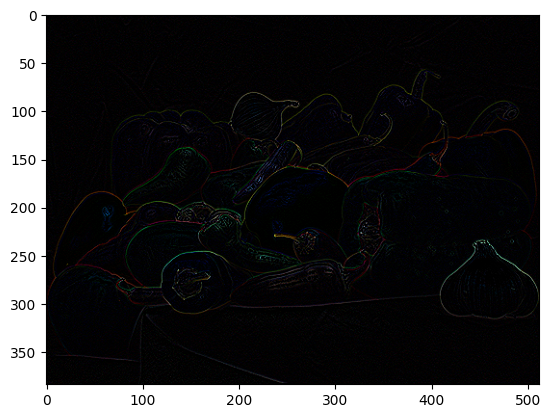

In [7]:
plt.imshow(filtered_peppers)

3. À partir de l'image originale et l'image obtenue en 2), comment pouvons-nous obtenir une image rehaussée ? Appliquer cette méthode. Afficher le résultat et commenter.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


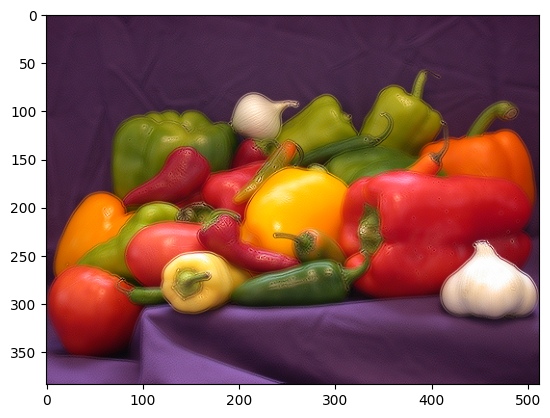

In [8]:
# A vous...
plt.imshow(filtered_peppers + peppers)

On peut obtenir une image rehaussée en ajoutant l'image filtrée à l'image originale. Cette méthode donne une image avec des contours amplifiés.


# Manipulation des composantes RGB

1. Affichage des composantes de l'image de la voiture : tp-m1-ts/tp5/2cv.jpg

![Extrait de Lena](https://gitlab.com/jeromefarinas/tp-m1-ts/-/raw/main/tp5/2cv.jpg?ref_type=heads)

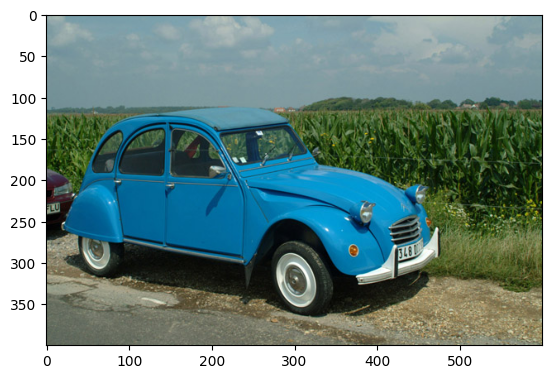

In [35]:
# A vous...
car = plt.imread('tp-m1-ts/tp5/2cv.jpg')
plt.imshow(car)

Red


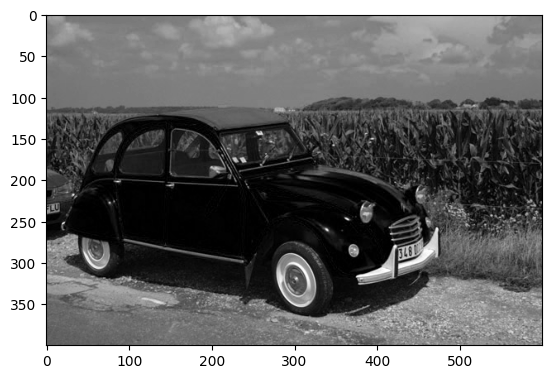

In [13]:
print("Red")
plt.imshow(car[:,:,0], cmap='grey')

Green


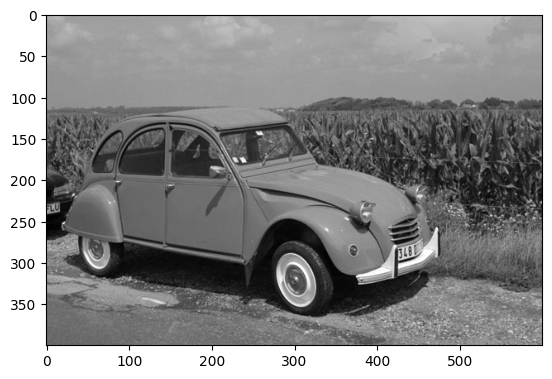

In [14]:
print("Green")
plt.imshow(car[:,:,1], cmap='grey')

Blue


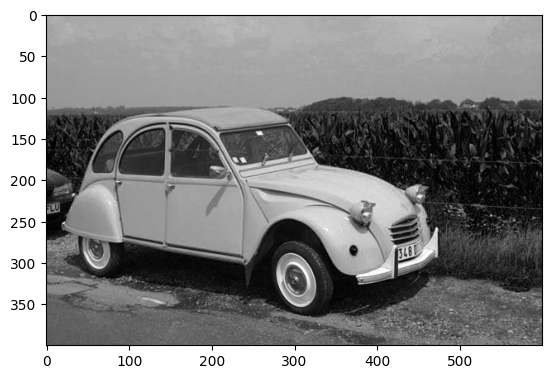

In [15]:
print("Blue")
plt.imshow(car[:,:,2], cmap='grey')

a. Construire l'image en intensité de la composante bleue uniquement. Pour cela :
* créer une image img_bleue de la même taille que img et contenant que des 0,
* copier les valeurs de la composante bleue de img dans img_bleue,
* afficher l'image : que remarquez-vous ?
![Extrait de Lena](https://gitlab.com/jeromefarinas/tp-m1-ts/-/raw/main/tp5/resultat_attendu/Figure_5.png?ref_type=heads)

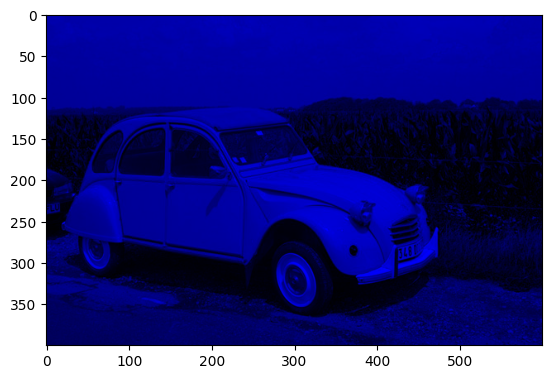

In [16]:
# A vous...
img_bleu = np.zeros_like(car)
img_bleu[:,:,2] = car[:,:,2]
plt.imshow(img_bleu)

Les valeurs de bleue sont prononcés sur le corps de la voiture et bien sûr dans le ciel, tandis que le mais dans le champ contient très peu de bleu. 

b. Construire de même l'image de la composante verte et l'image de la composante rouge.


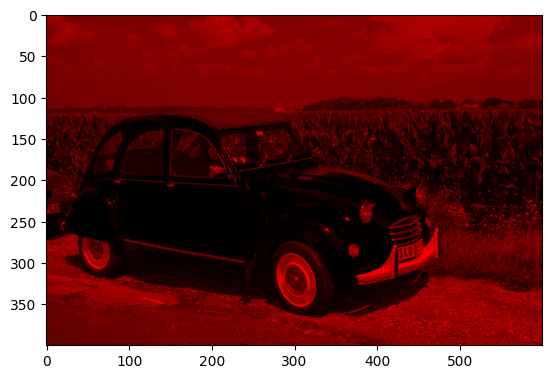

In [17]:
img_red = np.zeros_like(car)
img_red[:,:,0] = car[:,:,0]
plt.imshow(img_red)

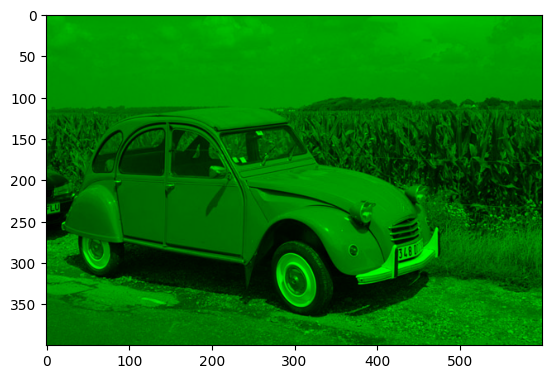

In [18]:
img_green = np.zeros_like(car)
img_green[:,:,1] = car[:,:,1]
plt.imshow(img_green)


c. Commenter l'évolution de l'intensité des pixels correspondant à la carrosserie de la voiture.

Vu que la carrosserie de la voiture est bleu, les composantes bleu et vert sont beaucoup plus fort dans la carrosserie que la composante rouge.

2. Filtrage en fonction des composantes

a. Construire l'image filtrée où ne sont retenus que les pixels dont l'intensité en bleu est supérieure à un seuil donné :

       dimensions=np.shape(img)
       seuil = 200
       masque = (img[:,:,2]> seuil)
       imgf = np.zeros(dimensions,dtype=np.uint8)
       imgf[masque,0] = img[masque,0]
       imgf[masque,1] = img[masque,1]
       imgf[masque,2] = img[masque,2]

Donner une valeur de la variable seuil sur la composante bleue qui permet d'obtenir la carrosserie complète de la voiture tout en éliminant un maximum des autres pixels de l'image. Identifier les principales zones ayant été retenues après filtrage et expliquer la raison de leur présence à l'image.

![Extrait de Lena](https://gitlab.com/jeromefarinas/tp-m1-ts/-/raw/main/tp5/resultat_attendu/Figure_8.png?ref_type=heads)

In [19]:
def mask_blue_image(seuil, image):
    mask = np.zeros_like(image)
    mask = (image[:,:,2] > seuil)
    imgf = np.zeros_like(image, dtype=np.uint8)
    imgf[mask,:] = image[mask,:]
    return imgf

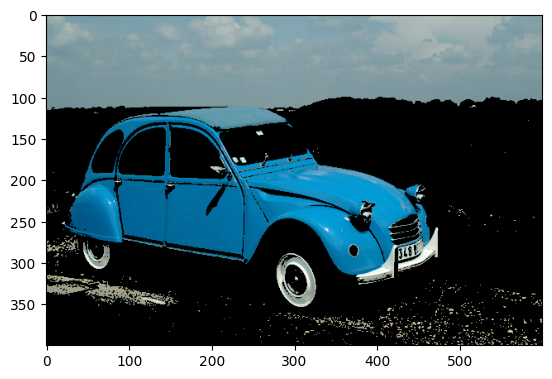

In [22]:
car_200 = mask_blue_image(130, car)
plt.imshow(car_200)

Les parties de l'image qui sont retenues sont la carrosserie, les pneus blancs, le ciel, et les trucs en acier de la voiture. Soit ces parties sont bleues, soit elles sont très claires et donc ont des valeurs rouges, vertes,, et bleues elévées.

b. Sur le même principe, proposer un seuillage sur la composante rouge pour essayer de conserver l'intégralité de la carrosserie de la voiture tout en éliminant un maximum de pixels. Produire le même type d'analyse que pour le résultat précédent.

![Extrait de Lena](https://gitlab.com/jeromefarinas/tp-m1-ts/-/raw/main/tp5/resultat_attendu/Figure_9.png?ref_type=heads)

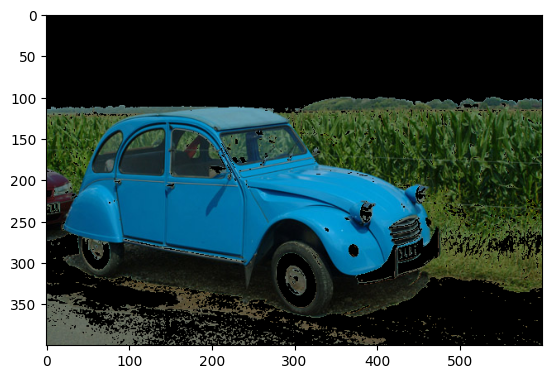

In [45]:
def mask_red_image(seuil, image):
    mask = np.zeros_like(image)
    mask = (image[:,:,0] < seuil)
    imgf = np.zeros_like(image, dtype=np.uint8)
    imgf[mask,:] = image[mask,:]
    return imgf
red_car = mask_red_image(110, car)
plt.imshow(red_car)

c. Proposer une combinaison des deux seuils précédents (sur la composante bleue et sur la composante rouge) pour cerner au mieux la carrosserie. Les seuils permettent ici de déterminer une région de l'image. Nous avons « masqué » les pixels n'appartenant pas à la voiture. D'une manière générale, en traitement d'image, un « masque » désigne une image qui identifie un sous- ensemble des pixels d'une image de départ.

![Extrait de Lena](https://gitlab.com/jeromefarinas/tp-m1-ts/-/raw/main/tp5/resultat_attendu/Figure_10.png?ref_type=heads)

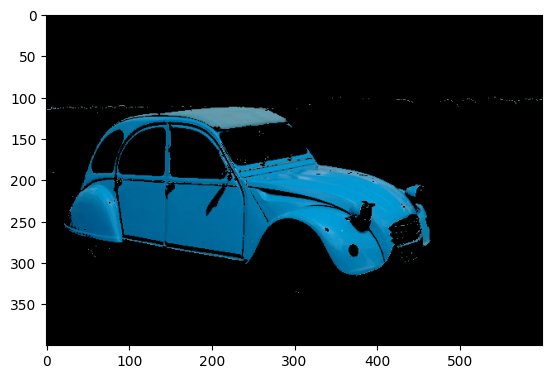

In [46]:
combined_car = car.copy()
combined_car = mask_blue_image(130, combined_car)
combined_car = mask_red_image(110, combined_car)
plt.imshow(combined_car)


d. À l'aide de ces informations, intervertissez les valeurs des composantes verte et bleue pour transformer la couleur de la voiture.

![Extrait de Lena](https://gitlab.com/jeromefarinas/tp-m1-ts/-/raw/main/tp5/resultat_attendu/Figure_11.png?ref_type=heads)

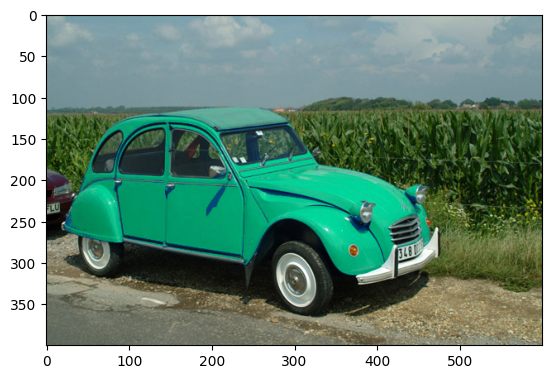

In [52]:
body_mask = np.zeros_like(combined_car)
body_mask = (combined_car[:,:,0] > 0) | (combined_car[:,:,1] > 0) | (combined_car[:,:,2] > 0)
# body_mask = np.logical_not(body_mask)
swapped_car = car.copy()
# Switch the green and blue channels of swapped_car if the body_mask is True
swapped_car[body_mask,1] = combined_car[body_mask,2]
swapped_car[body_mask,2] = combined_car[body_mask,1]
plt.imshow(swapped_car)

#Conversion d’image

1. Image en niveaux de gris et image binaire

a. Convertir l'image de départ en niveaux de gris et afficher le résultat obtenu, en utilisant la palette graphique composée de 256 niveaux de gris.

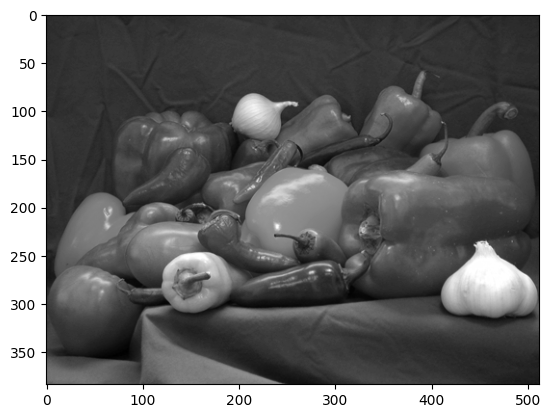

In [60]:
gray_peppers = np.mean(peppers, axis=2) * 255
plt.imshow(gray_peppers, cmap='gray')


b. Binariser l'image en niveaux de gris avec le seuil par défaut(128). Afficher les résultats obtenus.

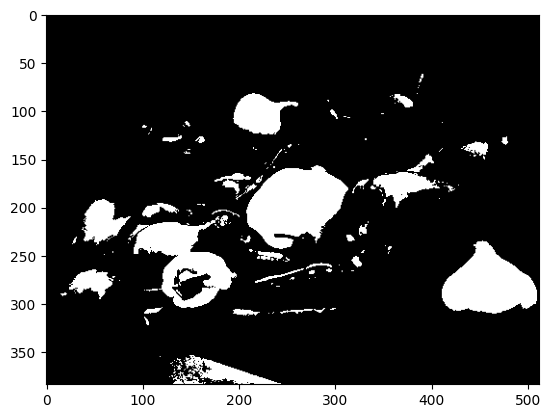

In [64]:
binary_gray_peppers = np.zeros_like(gray_peppers)
# Binarize the image with 0 and 1, threshold is 128
binary_gray_peppers = (gray_peppers > 128)
plt.imshow(binary_gray_peppers, cmap='gray')

2. Histogramme

a. Calculer l'histogramme de l'image en niveaux de gris.Afficher le résultat.

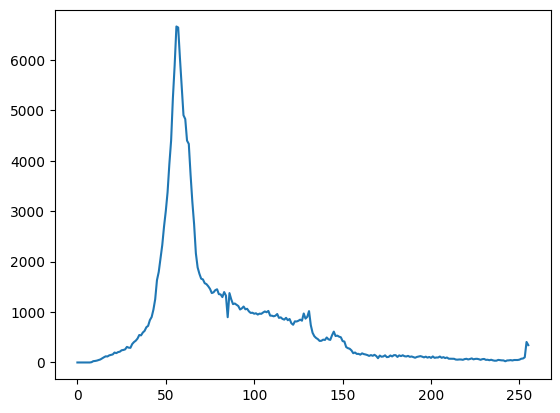

In [65]:
histogram = np.histogram(gray_peppers, bins=256, range=(0, 255))
plt.plot(histogram[0])

b. À l'aide de l'histogramme, est-il possible de binariser l'image en niveaux de gris de manière plus intelligente (afin que l'image binaire soit plus lisible) ?

Vu que l'histogram a des valeurs très grand autour de 60-70 par rapport à 128 comme on a utilisé avant, il serait mieux de prendre un seuil vers 70.

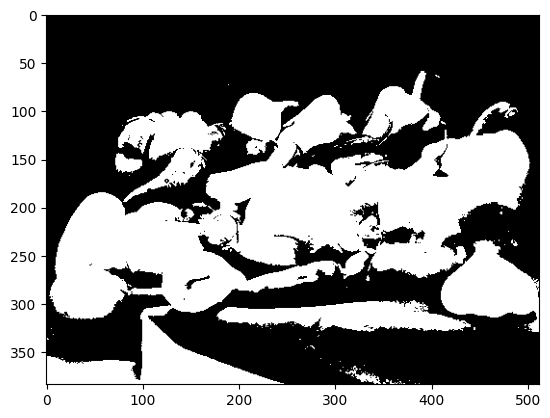

In [69]:
smart_binary_peppers = np.zeros_like(gray_peppers)
smart_binary_peppers = (gray_peppers > 75)
plt.imshow(smart_binary_peppers, cmap='gray')